# Prediction using Unsupervised ML 
## Dataset Link : https://bit.ly/3kXTdox

_The above dataset is Iris which has columns_ 

1. SepalLengthCm
2. SepalWidthCm
3. PetalLengthCm
4. PetalWidthCm
5. Species




## Problem Statement
_From the given 'Iris' dataset predict the optimum number of clusters and represent its visualization_

In [6]:
## Importing all Libraries
import warnings 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
warnings.filterwarnings("ignore")

In [7]:
## Loading the Iris dataset
iris_df = datasets.load_iris()

## Making a Data Frame of Iris dataset
df = pd.DataFrame(iris_df.data, columns = iris_df.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
X = df.iloc[:,:].values
range_n_cluster = [2,3,4,5,6]

## Using the Elbow method to find the optimal number of clusters

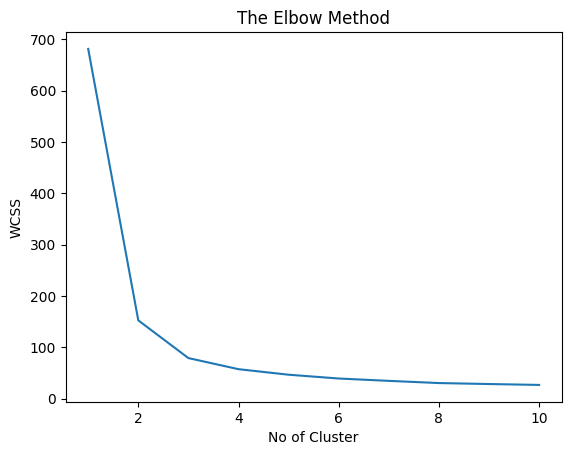

In [9]:
## Importing KMeans
from sklearn.cluster import KMeans

## wcss = with in cluster sum of square
wcss = []

## Running a for loop to find out the 
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter = 300, n_init = 10, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

## Plotting the graph No of Cluster vs WCSS
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Cluster')
plt.ylabel('WCSS')
plt.show()

**From the above graph we conclude that 3 no of cluster can form**

## Training the K-Means model on the dataset

In [10]:
## Applying KMeans to dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the Clusters

In [11]:
iris_df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

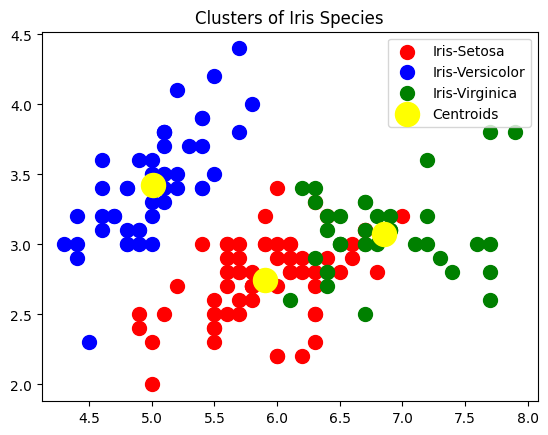

In [12]:
## Visualising the clusters - on two matrix
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-Setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-Versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-Virginica')

## Plotting the Centroidsa
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Iris Species')
plt.legend()
plt.show()

## Performance Matrix 

In [16]:
## defining no of clusters
range_n_clusters = [2,3,4,5,6]

For n_clusters = 2 The average silhouette_score is : 0.6810461692117462
For n_clusters = 3 The average silhouette_score is : 0.5528190123564095
For n_clusters = 4 The average silhouette_score is : 0.49805050499728737
For n_clusters = 5 The average silhouette_score is : 0.48874888709310566
For n_clusters = 6 The average silhouette_score is : 0.36784649847122436


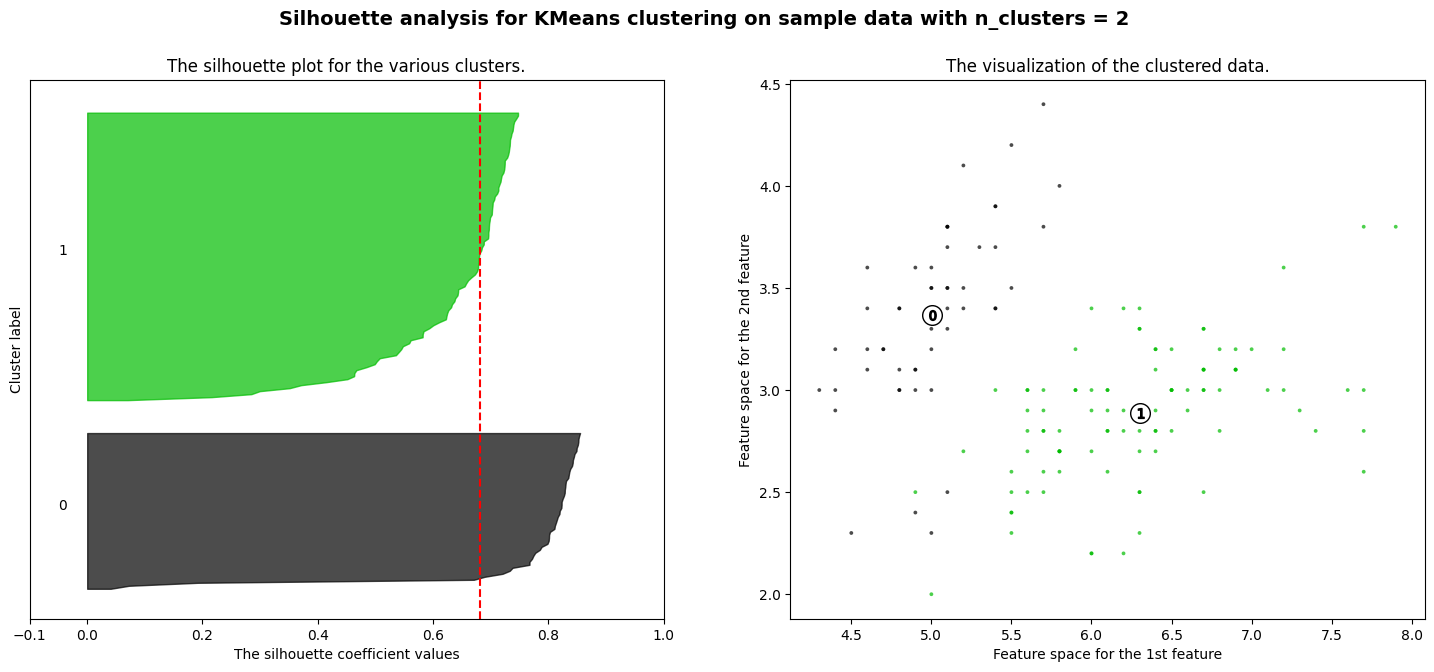

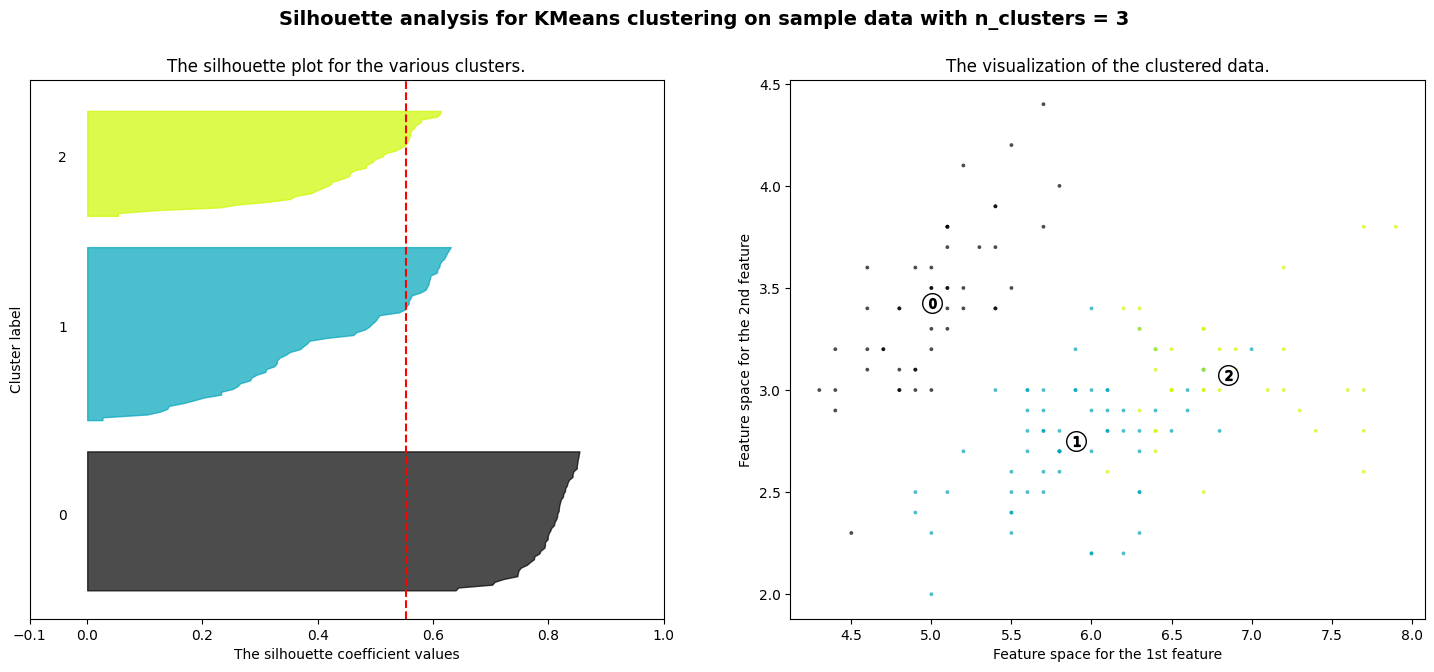

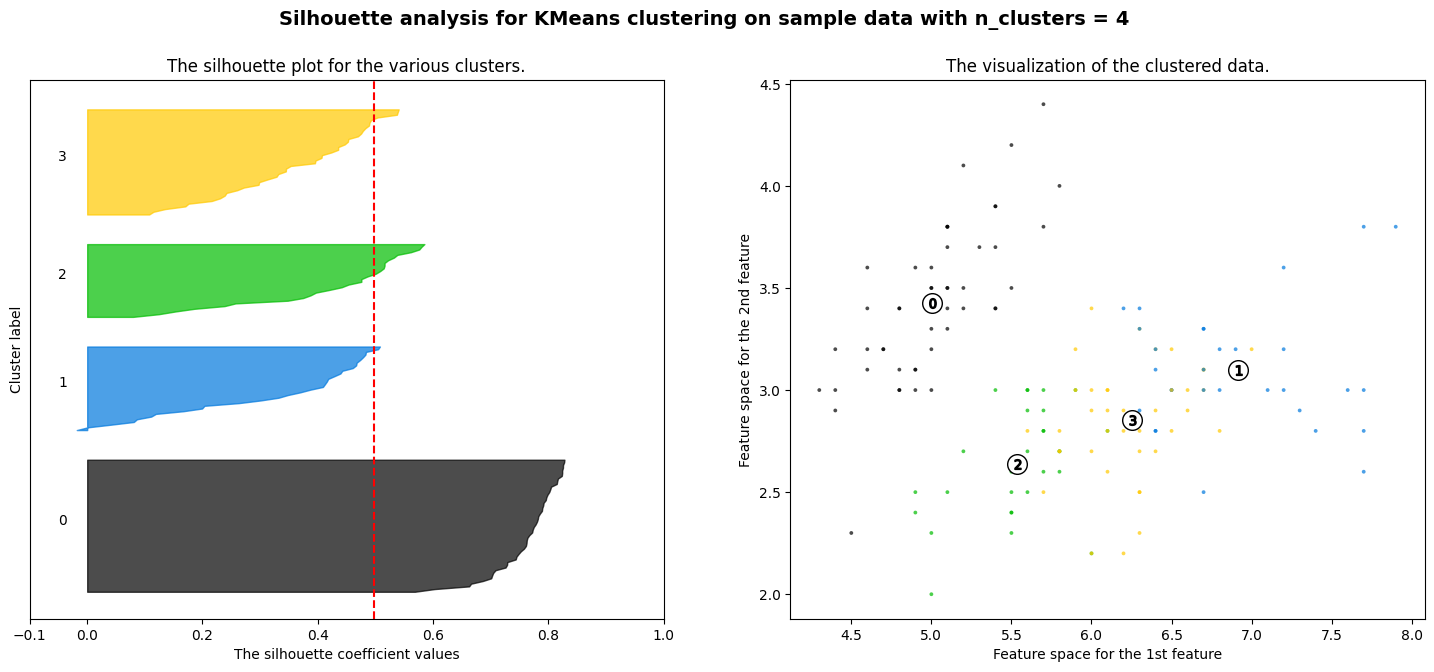

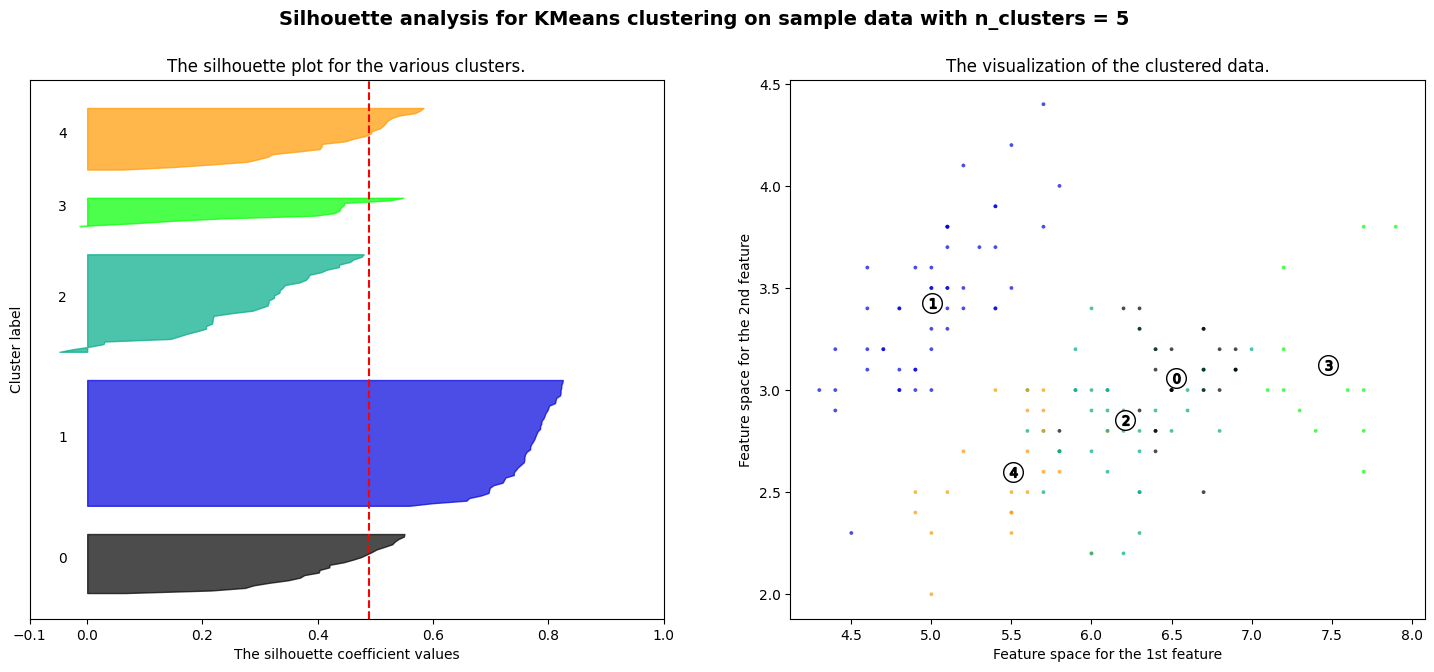

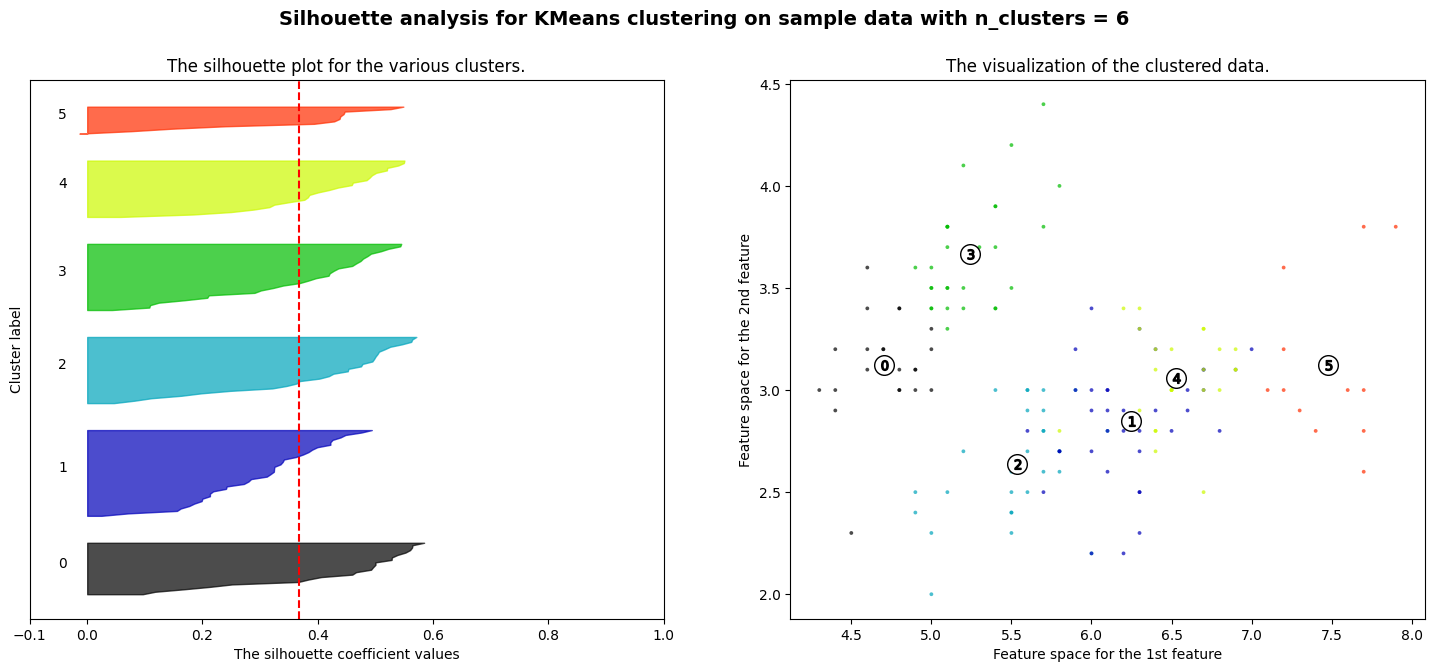

In [17]:
## Calculating the perfect silhouette score
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()